In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../SLD/sign_mnist_train.csv')
test= pd.read_csv('../SLD/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels = train['label'].values

In [5]:
unique_values = np.array(labels)
np.unique(unique_values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

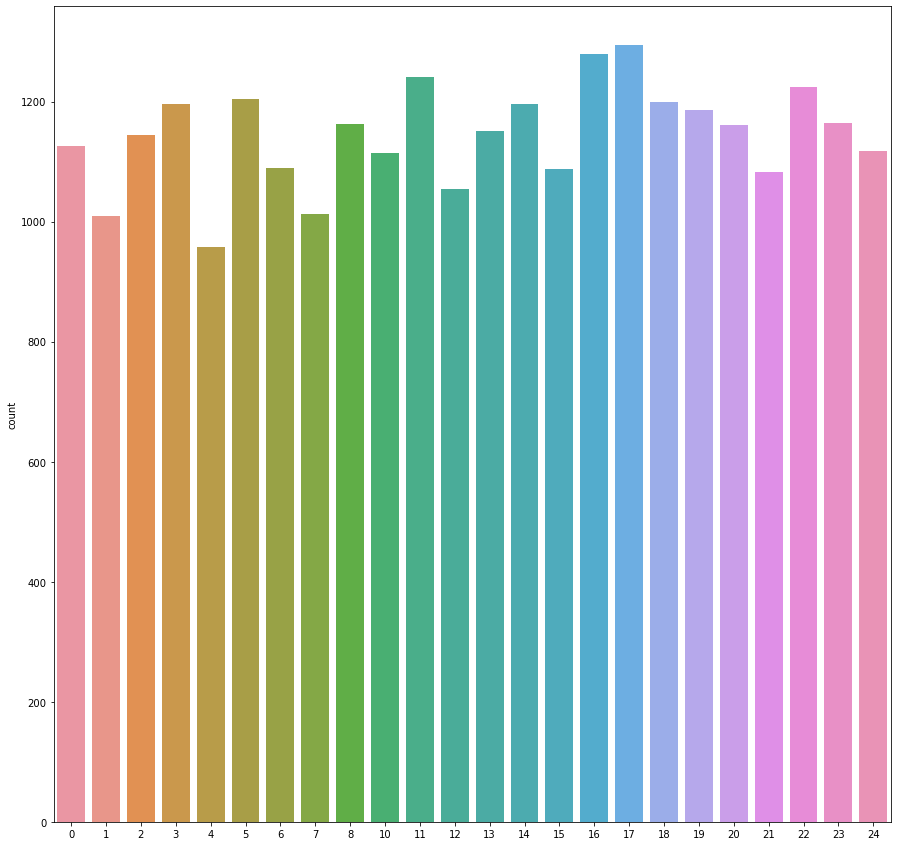

In [6]:
plt.figure(figsize=(15,15))
sns.countplot(x=labels)

In [7]:
train.drop('label', axis=1,inplace = True)

In [8]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [9]:
images = train.values
images

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [10]:
images = np.array([np.reshape(i,(28,28))for i in images])
#images = np.array(i.flatten() for i in images)

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels=lb.fit_transform(labels)

In [12]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

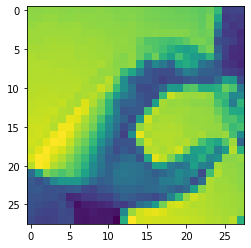

In [13]:
plt.imshow(images[3].reshape(28,28))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.3,random_state=100)

In [16]:
x_train.shape

(19218, 28, 28)

In [17]:
x_test.shape

(8237, 28, 28)

In [18]:
y_train.shape


(19218, 24)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout


In [20]:
import tensorflow

In [21]:
batch_size = 128
num_classes=24
epoches = 60

In [22]:
x_train=x_train/255
x_train

array([[[0.54117647, 0.55294118, 0.56470588, ..., 0.69019608,
         0.69411765, 0.69411765],
        [0.54509804, 0.55686275, 0.56862745, ..., 0.69803922,
         0.69803922, 0.69803922],
        [0.54901961, 0.56078431, 0.56862745, ..., 0.70196078,
         0.70196078, 0.70588235],
        ...,
        [0.56470588, 0.57647059, 0.58823529, ..., 0.73333333,
         0.73333333, 0.73333333],
        [0.56470588, 0.57647059, 0.58431373, ..., 0.7254902 ,
         0.7254902 , 0.72941176],
        [0.56078431, 0.57254902, 0.57647059, ..., 0.71764706,
         0.72156863, 0.72156863]],

       [[0.66666667, 0.6745098 , 0.68235294, ..., 0.61568627,
         0.61176471, 0.61176471],
        [0.6745098 , 0.68235294, 0.68627451, ..., 0.62352941,
         0.61568627, 0.61176471],
        [0.6745098 , 0.68627451, 0.69411765, ..., 0.63137255,
         0.62352941, 0.61568627],
        ...,
        [0.74117647, 0.75294118, 0.75686275, ..., 0.71764706,
         0.70588235, 0.69803922],
        [0.7

In [23]:
x_test=x_test/255

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [25]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [26]:
x_train

array([[[[0.54117647],
         [0.55294118],
         [0.56470588],
         ...,
         [0.69019608],
         [0.69411765],
         [0.69411765]],

        [[0.54509804],
         [0.55686275],
         [0.56862745],
         ...,
         [0.69803922],
         [0.69803922],
         [0.69803922]],

        [[0.54901961],
         [0.56078431],
         [0.56862745],
         ...,
         [0.70196078],
         [0.70196078],
         [0.70588235]],

        ...,

        [[0.56470588],
         [0.57647059],
         [0.58823529],
         ...,
         [0.73333333],
         [0.73333333],
         [0.73333333]],

        [[0.56470588],
         [0.57647059],
         [0.58431373],
         ...,
         [0.7254902 ],
         [0.7254902 ],
         [0.72941176]],

        [[0.56078431],
         [0.57254902],
         [0.57647059],
         ...,
         [0.71764706],
         [0.72156863],
         [0.72156863]]],


       [[[0.66666667],
         [0.6745098 ],
         [0.68

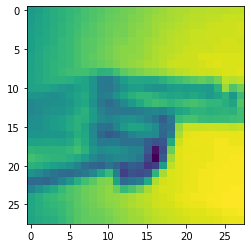

In [27]:
plt.imshow(x_train[0].reshape(28,28))

In [29]:
model= Sequential()
#first convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) ))
model.add(MaxPool2D(pool_size=(2,2)))
#second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#third
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#flattening
model.add(Flatten())
#fully connected layer
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.30))
#output layer
model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [30]:
history= model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=epoches,batch_size=batch_size)

Epoch 1/60
151/151 [==============================] - 17s 114ms/step - loss: 2.6933 - accuracy: 0.1734 - val_loss: 1.8338 - val_accuracy: 0.4317
Epoch 2/60
151/151 [==============================] - 16s 107ms/step - loss: 1.3934 - accuracy: 0.5321 - val_loss: 0.8882 - val_accuracy: 0.7188
Epoch 3/60
151/151 [==============================] - 16s 103ms/step - loss: 0.8445 - accuracy: 0.7107 - val_loss: 0.5610 - val_accuracy: 0.8162
Epoch 4/60
151/151 [==============================] - 17s 112ms/step - loss: 0.5868 - accuracy: 0.7995 - val_loss: 0.3796 - val_accuracy: 0.8865
Epoch 5/60
151/151 [==============================] - 17s 113ms/step - loss: 0.4220 - accuracy: 0.8558 - val_loss: 0.2344 - val_accuracy: 0.9343
Epoch 6/60
151/151 [==============================] - 17s 113ms/step - loss: 0.3006 - accuracy: 0.9015 - val_loss: 0.1481 - val_accuracy: 0.9610
Epoch 7/60
151/151 [==============================] - 17s 113ms/step - loss: 0.2231 - accuracy: 0.9264 - val_loss: 0.1203 - val_ac

Text(0.5, 1.0, 'accuracy evaluation')

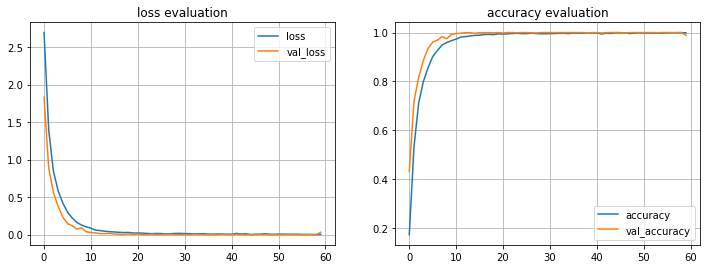

In [32]:
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.grid()
plt.title('loss evaluation')


plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('accuracy evaluation')

In [29]:
pred_class=model.predict(x_test)

In [30]:
pred_class

array([[0.        , 0.01328993, 0.        , ..., 0.02429697, 0.        ,
        0.01344441],
       [0.        , 0.02562349, 0.        , ..., 0.02522628, 0.        ,
        0.01161819],
       [0.        , 0.03066199, 0.        , ..., 0.03185191, 0.        ,
        0.01245021],
       ...,
       [0.        , 0.02941325, 0.        , ..., 0.04188354, 0.        ,
        0.01966888],
       [0.        , 0.0418606 , 0.        , ..., 0.04364152, 0.        ,
        0.02207161],
       [0.        , 0.02855926, 0.        , ..., 0.02382913, 0.        ,
        0.01527061]], dtype=float32)

In [1]:
r,c=5,5
fig,axes=plt.subplots(r,c,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,r*c):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"pclass={pred_class[i]:0.1f}\n Tclass={y_test[i]:0.1f}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=1)    

NameError: name 'plt' is not defined